Original code by **Raghavender Ganesh**.   
Updated with better documentation and code readability.
### 2 - Image analysis on Biomedical Image and perform segmentation and feature extraction

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [43]:
from skimage import color
from skimage.filters import threshold_otsu
from skimage.morphology import closing,square
from skimage.segmentation import clear_border
from skimage.measure import label
from skimage.measure import regionprops

### View Original Image

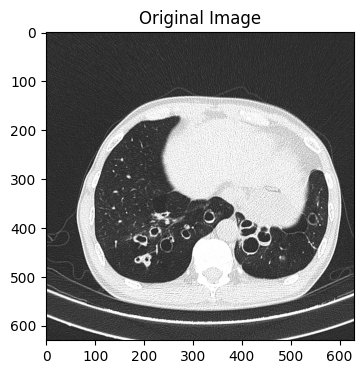

In [44]:
img = cv2.imread("lung.jpeg")

#gray_img=color.rgb2gray(img) If they give a color image

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title("Original Image")
plt.show()

## PreProcessing
- Resize 
- Gaussian Blur

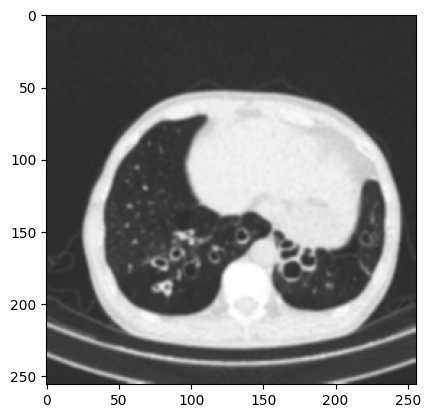

In [45]:
#Resize the image
resized_img=cv2.resize(img,(256,256))

#Gaussian Blurring
blurred_img=cv2.GaussianBlur(resized_img,(5,5),0)

plt.imshow(blurred_img)

### Image Segmentation

**LABEL**: Label connected regions of an integer array.
    Two pixels are connected when they are neighbors and have the same value.
    In 2D, they can be neighbors either in a 1- or 2-connected sense.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_19052\295416007.py:8: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  binary_img = closing(gray_img > thresh, square(3))


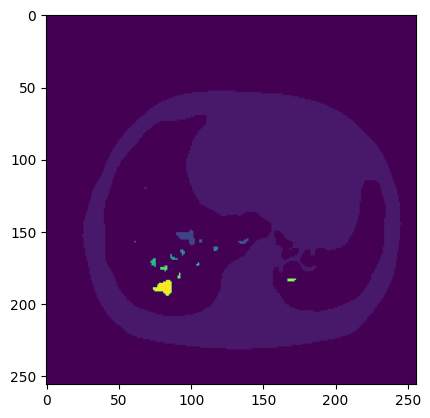

In [46]:
# Grey Image
gray_img = color.rgb2gray(blurred_img)

# Otsu Thresholding
thresh = threshold_otsu(gray_img)

# This tends to "close" up (dark) gaps between (bright) features.
binary_img = closing(gray_img > thresh, square(3)) 

# Segmentation
cleared_img = clear_border(binary_img)

# Label
label_img = label(cleared_img)

plt.imshow(label_img)

## Bounding Box

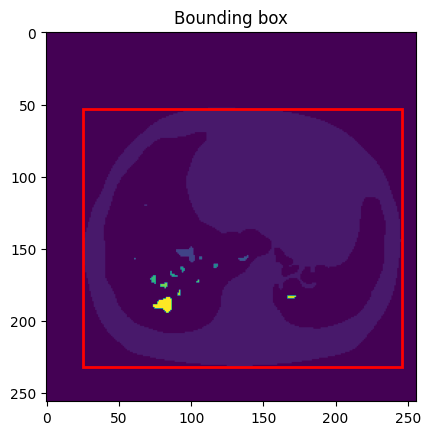

In [47]:
plt.imshow(label_img)
plt.title("Bounding box")

regions = regionprops(label_img)


for region in regions:
    if region.area > 100:
        # Bounding box coordinates 
        min_row, min_col, max_row, max_col = region.bbox

        # Draw rectangle around segmented regions
        rect = plt.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, fill=False, edgecolor="red", linewidth=2)

        # Get current axes (GCA) and draw rectangle on top of it.
        plt.gca().add_patch(rect)
plt.show()

## Synthetic Images

generation of sythetic images for medical image 

In [48]:
#Generate synthetic images
import cv2
import numpy as np
from skimage.feature import canny
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

In [49]:
# Generate pixelated images
image = np.random.rand(100, 100)

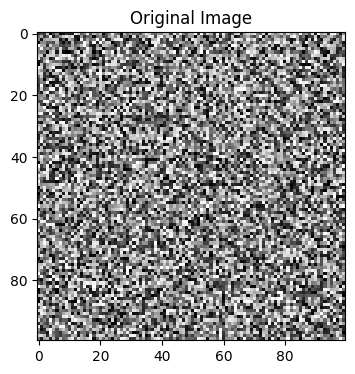

In [50]:
# 1. Display original synthetic image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

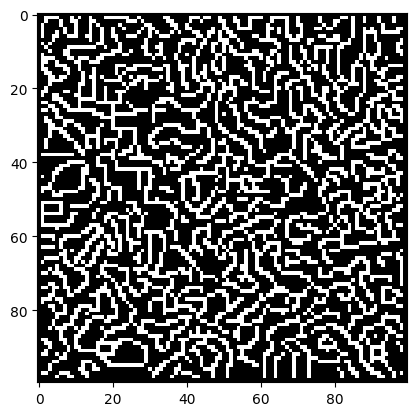

In [51]:
# Denoise images using Gaussian Blur
image = cv2.GaussianBlur(image, (5, 5), 0)

# Perform edge detection using Canny
edge = canny(image) 

# 2. Display edge detection result
plt.imshow(edge, cmap='gray')

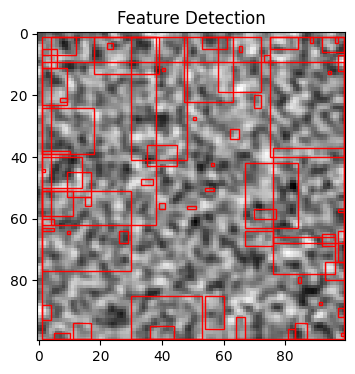

In [52]:
# Extract features (region properties)
features = regionprops(label(edge))


# 3. Display feature detection with bounding boxes
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
for region in features:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, 
                        edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)
plt.title("Feature Detection")
plt.show()